<a href="https://colab.research.google.com/github/hpnightowl/Owlsbooks/blob/master/diseaseleafpaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [75]:
!kaggle competitions download -c cassava-disease

 99% 772M/777M [00:13<00:00, 21.5MB/s]
100% 777M/777M [00:13<00:00, 59.8MB/s]
 98% 1.02G/1.04G [00:12<00:00, 124MB/s]
100% 1.04G/1.04G [00:12<00:00, 87.5MB/s]
random.txt: Skipping, found more recently modified local copy (use --force to force download)
 98% 504M/515M [00:06<00:00, 92.0MB/s]
100% 515M/515M [00:06<00:00, 85.1MB/s]
sample_submission_file.csv: Skipping, found more recently modified local copy (use --force to force download)


In [76]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: extraimages/extra-image-15935.jpg  
  inflating: extraimages/extra-image-5819.jpg  
  inflating: extraimages/extra-image-4050.jpg  
  inflating: extraimages/extra-image-2421.jpg  
  inflating: extraimages/extra-image-15262.jpg  
  inflating: extraimages/extra-image-6647.jpg  
  inflating: extraimages/extra-image-9574.jpg  
  inflating: extraimages/extra-image-7559.jpg  
  inflating: extraimages/extra-image-1896.jpg  
  inflating: extraimages/extra-image-9212.jpg  
  inflating: extraimages/extra-image-15504.jpg  
  inflating: extraimages/extra-image-5428.jpg  
  inflating: extraimages/extra-image-2347.jpg  
  inflating: extraimages/extra-image-3059.jpg  
  inflating: extraimages/extra-image-13175.jpg  
  inflating: extraimages/extra-image-4736.jpg  
  inflating: extraimages/extra-image-884.jpg  
  inflating: extraimages/extra-image-15510.jpg  
  inflating: extraimages/extra-image-2353.jpg  
  inflating: extraimages/extra-im

In [77]:
import matplotlib.pyplot as plt

def display_image(image):
    plt.imshow(image)
    plt.show()

In [78]:
!ls /content/train/cbb/ | wc -l
!ls /content/train/cbsd/ | wc -l
!ls /content/train/cgm/ | wc -l
!ls /content/train/cmd/ | wc -l
!ls /content/train/healthy/ | wc -l

466
1443
773
2658
316


In [79]:
import tensorflow as tf
def load_and_display_image(path):
    image = tf.keras.preprocessing.image.load_img(path)
    display_image(image)

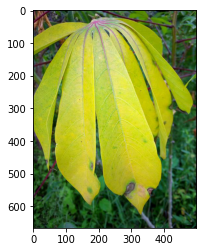

In [80]:
load_and_display_image('/content/train/cbb/train-cbb-150.jpg')

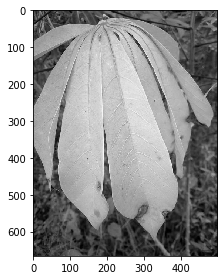

In [81]:
image = imread('/content/train/cbb/train-cbb-150.jpg', as_gray=True)
imshow(image)

In [82]:
from PIL import Image, ImageOps

img = ImageOps.grayscale(Image.open('/content/train/cbb/train-cbb-150.jpg'))
img_arr = np.array(img)

In [83]:
from skimage.io import imread, imshow

img = imread('/content/train/cbb/train-cbb-150.jpg')
img.shape

(666, 500, 3)

In [84]:
def conv2d(image_arr, conv_filter):
    # copy image
    image_copy = np.copy(image_arr)
    # get image dims
    size_x, size_y = image_copy.shape

    # for each pixel (x, y) in the image
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            # initial convolution ops result = 0
            convolution = 0.0
            # apply convolution on 3x3 patch of image with 3x3 filter \ kernel
            #   Source Image Patch (3x3)           Convolution Filter (3x3)     New Image - position (x,y) 
            # [x-1, y-1] [x, y-1] [x+1, y-1]      [f(0,0)] [f(0,1)] [f(0,2)]
            # [x-1, y  ] [ x, y ] [x+1, y  ]  *   [f(1,0)] [f(1,1)] [f(1,2)]     =    [NI(x, y)]
            # [x-1, y+1] [x, y+1] [x+1, y+1]      [f(2,0)] [f(2,1)] [f(2,2)]
            convolution = convolution + (image_arr[x - 1, y-1] * conv_filter[0][0])
            convolution = convolution + (image_arr[x, y-1] * conv_filter[0][1])
            convolution = convolution + (image_arr[x + 1, y-1] * conv_filter[0][2])

            convolution = convolution + (image_arr[x-1, y] * conv_filter[1][0])
            convolution = convolution + (image_arr[x, y] * conv_filter[1][1])
            convolution = convolution + (image_arr[x+1, y] * conv_filter[1][2])
            
            convolution = convolution + (image_arr[x-1, y+1] * conv_filter[2][0])
            convolution = convolution + (image_arr[x, y+1] * conv_filter[2][1])
            convolution = convolution + (image_arr[x+1, y+1] * conv_filter[2][2])
            filter_wt_sum = np.sum(conv_filter)
            # normalize to make filter weights add up to 1
            weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
            convolution = convolution * weight
            # clip max \ min pixels
            if(convolution<0):
                convolution = 0
            if(convolution>255):
                convolution = 255
            # assign convolution ops result to new image pixel image_copy(x, y)
            image_copy[x, y] = convolution

    return image_copy

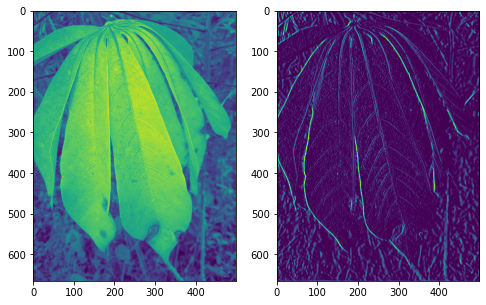

In [85]:
# applied Edge Detection - Sobel  (vertical edges)
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -2, -1], 
                                              [0, 0, 0], 
                                              [1, 2, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

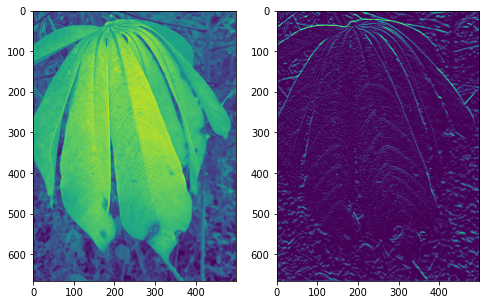

In [86]:
# applied Edge Detection - Sobel  (vertical edges)
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, 0, 1], 
                                                  [-2, 0, 2], 
                                                  [-1, 0, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

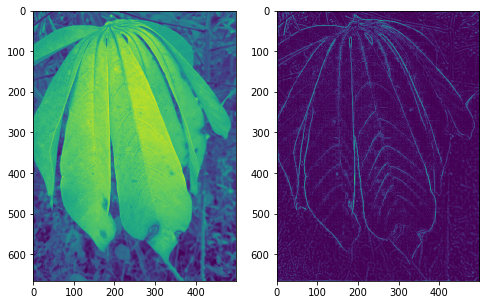

In [87]:
# applied Edge Detection: Outline kernel

conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

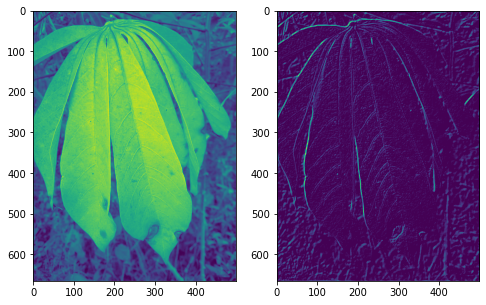

In [88]:
# applied Emboss Kernel
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -1, 0], 
                                                  [-1, 0, 1], 
                                                  [0, 1, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

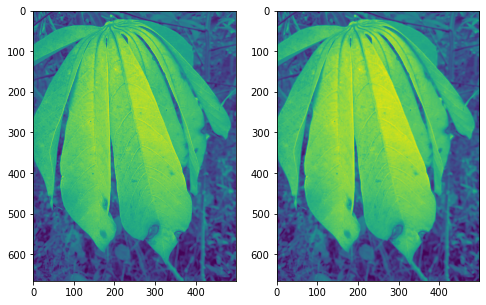

In [89]:
# applied Gaussian Blur Kernel
conv_res = conv2d(image_arr=img_arr, conv_filter=np.array([[1, 2, 1], 
                                                           [2, 4, 2], 
                                                           [1, 2, 1]])/16.)
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

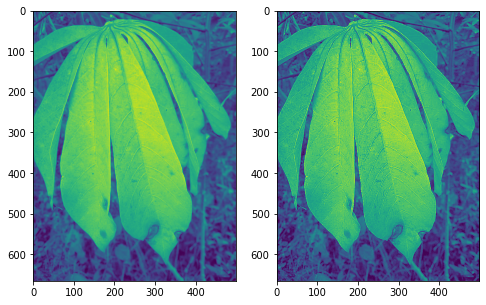

In [90]:
# applied Sharpen Kernel
conv_res = conv2d(image_arr=img_arr, conv_filter=[[0, -1, 0], 
                                                  [-1, 5, -1], 
                                                  [0, -1, 0]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

In [91]:
def maxpooling2d(image_arr):
    # get image dims
    size_x, size_y = image_arr.shape
    # generate new image
    new_size_x, new_size_y = size_x // 2, size_y // 2
    image_new = np.zeros((new_size_x, new_size_y))
    # for each pixel (x, y) in the image with interval of 2
    for x in range(0, size_x-1, 2):
        for y in range(0, size_y-1, 2):
            # initial pixel values = []
            pixels = []
            # apply max pool on 2x2 patch of image 
            #  Image Patch (2x2)              
            # [ x, y ] [x+1, y  ]    
            # [x, y+1] [x+1, y+1]      
            pixels.append(image_arr[x, y])
            pixels.append(image_arr[x+1, y])

            pixels.append(image_arr[x, y+1])
            pixels.append(image_arr[x+1, y+1])
            # take max of pixels to assign to new image pixel image_new(x, y)
            image_new[x//2, y//2] = max(pixels)

    return image_new

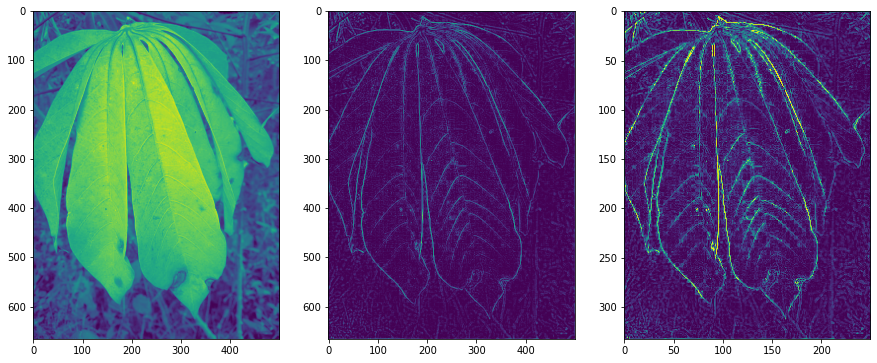

In [92]:
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

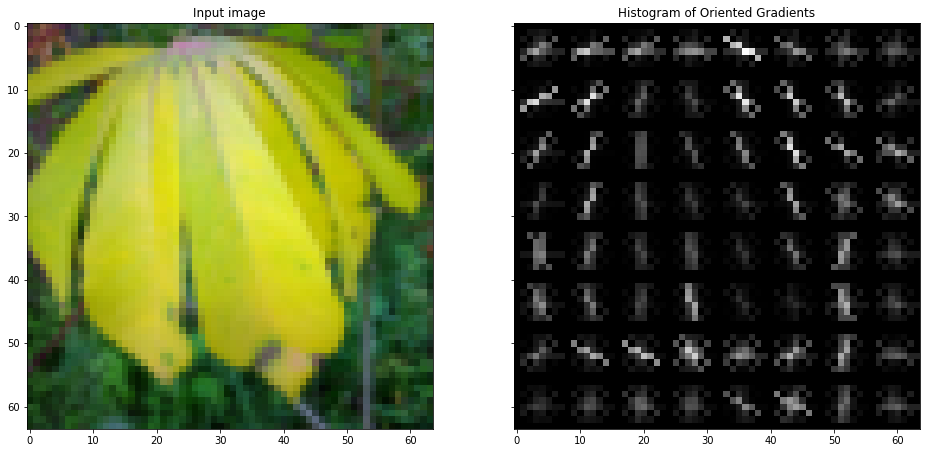

In [93]:
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

resized_img = resize(img, (64,64)) 

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

HOG, or Histogram of Oriented Gradients, is a feature descriptor that is often used to extract features from image data. It is widely used in computer vision tasks for object detection.

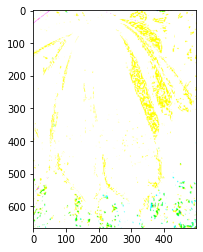

In [94]:
plt.imshow(img.astype(bool).astype(float), cmap='hot')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


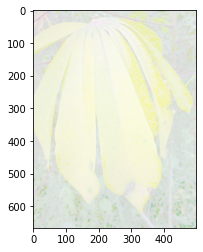

In [95]:
import scipy.ndimage as ndi            # to determine shape centrality

dist_2d = ndi.distance_transform_edt(img)
plt.imshow(img, cmap='Greys', alpha=.2)
plt.imshow(dist_2d, cmap='plasma', alpha=.2)
plt.show()

While I was looking up how to threshold an image, I have found this.
The further away from the edges a pixel is, the higher value it gets.
This is important, because it describes the morphology of the leaf better, 
than a simple euclidean distance from the center, because it considers
concave parts differently, and that's an important feature I wish to keep.
This is very promising. Using this, I will probably be able to find symmetry.
I also believe, that using this distance map, I will be able to separate
the core shape of the leaf and the edge texture, which are two distinct,
pretty good features.

In [96]:
IMAGE_SHAPE = 96
BATCH_SIZE = 70
BUFFER_SIZE = 200
PREFETCH = tf.data.experimental.AUTOTUNE

In [97]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=8,
                                                                zoom_range=[0.9, 1.25],
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1/255,
                                                                dtype='tf.float32',
                                                                validation_split=0.2,
                                                               )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                               dtype='tf.float32',
                                                                validation_split=0.2,
                                                               )

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                              dtype='tf.float32'
                                                              )
train_datagen = train_datagen.flow_from_directory('/content/train/',
                                                 target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='training')

valid_datagen = valid_datagen.flow_from_directory('/content/train/',
                                                 target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 seed=42,
                                                 subset='validation')

test_datagen = test_datagen.flow_from_directory('/content/',
                                               target_size=(IMAGE_SHAPE,IMAGE_SHAPE),
                                               batch_size=BATCH_SIZE,
                                               classes=['test']
                                               )

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.
Found 3774 images belonging to 1 classes.


In [98]:
train_datagen.next()[1].shape

(70, 5)

In [99]:
base_model = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet',input_shape=(IMAGE_SHAPE,IMAGE_SHAPE,3))

In [100]:
base_model.trainable = False

In [101]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.7,patience=3, verbose=2, mode='auto',min_lr=1e-6)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6, verbose=2, mode='auto',baseline=None, restore_best_weights=True)

In [102]:
try:
    with tf.device('/device:GPU:0'):
        inputs = tf.keras.layers.Input(shape=(IMAGE_SHAPE,IMAGE_SHAPE,3))
        x = base_model(inputs)
        x = tf.keras.layers.GaussianNoise(0.2)(x)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        outputs = tf.keras.layers.Dense(5,activation="softmax")(x)

        model = tf.keras.Model(inputs=[inputs],outputs=[outputs])

        model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                      loss=tf.keras.losses.CategoricalCrossentropy(),
                      #loss=tfa.losses.SigmoidFocalCrossEntropy(),
                      metrics=['accuracy'])

        model.fit(train_datagen,epochs=5,validation_data=valid_datagen,callbacks = [reduce_lr,early_stop])
except RuntimeError as e:
    print(e)   

Epoch 1/5
65/65 [==============================] - 60s 888ms/step - loss: 1.4629 - accuracy: 0.4541 - val_loss: 1.0408 - val_accuracy: 0.5934
Epoch 2/5
65/65 [==============================] - 57s 871ms/step - loss: 1.0496 - accuracy: 0.5904 - val_loss: 0.9785 - val_accuracy: 0.6413
Epoch 3/5
65/65 [==============================] - 57s 868ms/step - loss: 0.9514 - accuracy: 0.6425 - val_loss: 0.9441 - val_accuracy: 0.6377
Epoch 4/5
65/65 [==============================] - 56s 859ms/step - loss: 0.8991 - accuracy: 0.6648 - val_loss: 0.9321 - val_accuracy: 0.6537
Epoch 5/5
65/65 [==============================] - 56s 869ms/step - loss: 0.8961 - accuracy: 0.6582 - val_loss: 0.9405 - val_accuracy: 0.6616
